<a href="https://colab.research.google.com/github/prashantmalan/MarketRisk/blob/main/frtb_sa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary on FRTB SA Implementation

The Fundamental Review of the Trading Book (FRTB) introduces significant changes to the capital requirements for market risk, aiming to enhance the robustness of the banking sector. The revised framework, effective from January 1, 2022, replaces the previous Basel II standards and is designed to address the shortcomings identified during the financial crisis .

## Key Components of the FRTB

### 1. Boundary Between Banking and Trading Books
The FRTB emphasizes a clear boundary between the banking book and the trading book, ensuring that instruments are assigned to the appropriate regulatory book based on their intended use . This distinction is crucial for accurately measuring and managing market risk.

### 2. Scope of the Trading Book
The trading book encompasses all instruments that are held for short-term resale or to profit from short-term price movements . The guidelines specify that banks must document the designation of instruments to the trading book and adhere to strict supervisory reviews to ensure compliance .

### 3. Standardized Approach and Internal Models Approach
Banks can choose between two methodologies for calculating market risk capital requirements: the standardized approach and the internal models approach (IMA) . The standardized approach is mandatory for certain exposures, such as securitizations and equity investments in funds that cannot be looked through . The IMA allows banks to use their internal risk models, subject to supervisory approval, to determine capital requirements based on expected shortfall (ES) .

### 4. Sensitivities-Based Method
Under the standardized approach, the capital requirement is calculated using a sensitivities-based method that aggregates three risk measures: delta, vega, and curvature . This method captures the non-linear price characteristics of options and other derivatives, ensuring that banks account for the full spectrum of market risks .

### 5. Curvature Risk
Curvature risk is particularly important for options, as it captures the incremental risk not accounted for by delta risk . Banks must apply upward and downward shocks to risk factors to assess curvature risk accurately, and the capital requirement is determined by the greater of the two scenarios .

### 6. Documentation and Supervisory Review
The FRTB mandates comprehensive documentation of risk management practices and instrument designations . Supervisors are empowered to review and challenge banks' designations and risk management frameworks, ensuring that they align with regulatory expectations .

### 7. Backtesting and Profit and Loss Attribution
Banks using the IMA must conduct rigorous backtesting and profit and loss (P&L) attribution tests to validate their risk models . These tests compare the theoretical P&L generated by the models with actual P&L, ensuring that the models accurately reflect market risks .

### 8. Stress Testing
Stress testing is a critical component of the FRTB framework, requiring banks to assess their capital adequacy under extreme market conditions . Banks must develop stress scenarios that reflect potential market disruptions and evaluate their impact on trading portfolios .

### 9. Aggregation of Capital Requirements
The total capital requirement for market risk is the sum of the capital requirements calculated under the standardized approach and the IMA, ensuring that banks maintain adequate capital buffers to absorb potential losses . This aggregation process must consider correlations between different risk factors to recognize diversification benefits .

### Conclusion
The FRTB represents a significant evolution in the regulatory landscape for market risk, emphasizing the need for robust risk management practices and clear documentation. By implementing the FRTB framework, banks can enhance their resilience to market fluctuations and contribute to the overall stability of the financial system . The successful implementation of these standards will require ongoing collaboration between banks and supervisory authorities to ensure compliance and effective risk management.

To calculate the market risk capital charges under the Standardized Approach for Market Risk (FRTB SA), you need to compute the following steps for risk factor sensitivities:

Key Steps to Calculate Sensitivities and Risk Weights:

####Identify Risk Factors:

Determine the risk factors for each asset class in the portfolio, including interest rates, equity prices, credit spreads, etc.
Calculate Sensitivities:

####Compute the sensitivity
of each instrument in the portfolio to its respective risk factors. Sensitivity measures how much the value of an instrument changes in response to changes in a risk factor.
Net Sensitivities:

####Net the sensitivities
 across all instruments for each risk factor. This involves summing the sensitivities, considering the direction and nature of each position (e.g., long vs. short).
Weighted Sensitivities:

####Multiply the net sensitivity
 for each risk factor by its corresponding risk weight to obtain the weighted sensitivity. The risk weights are determined by regulatory guidelines and reflect the riskiness of the factor.

####Aggregate Within Buckets:

Aggregate the weighted sensitivities within predefined risk buckets, as set out by the regulations. This involves combining sensitivities for similar risk factors.

####Compute Capital Charge:

Finally, apply the aggregation formulas to compute the capital charge, taking into account diversification benefits and correlation effects between different risk factors.


- **Demonstration**:
  - The text demonstrates the step-by-step calculation for GIRR, Equity, and FX risk classes.

- **Portfolios**:
  - There are three portfolios: IR (Interest Rate), Equity, and FX (Foreign Exchange).

- **Calculations**:
  - For each portfolio, the particular risk is calculated.
  - For Equity, the calculations include Delta, Vega, and Curvature.
  - Similar calculations are performed for FX and IR.

- **Extensibility**:
  - There can be multiple risk factors for each asset class.
  - The solution can be extended to include more risk factors.
  - The implementation remains the same regardless of the number of risk factors.


- **Purpose**:
  - The code is designed to simulate a trading book of interest rate-sensitive trades, including their sensitivities and vega values.

- **GIRR and Vega Risk Weights**:
  - Dictionaries (`girr_risk_weights` and `vega_risk_weights`) define the risk weights for each tenor for both GIRR (General Interest Rate Risk) and Vega (volatility sensitivity).

- **Correlation Matrix**:
  - Dictionary (`correlation_matrix`) defines the correlation between different tenors. It is used to model how changes in one tenor might affect another.

- **Across-Bucket Correlation**:
  - Variable (`gamma_bc`) defines the correlation between different buckets.

- **Trade Generation**:
  - The code simulates a trading book with 1000 interest rate-sensitive trades.
  - Each trade has random attributes such as asset class, quantity, price, market value, counterparty, underlying curve, and currency.
  - The sensitivities and vega values for each tenor are calculated based on predefined risk weights and exchange rates.

- **Usage**:
  - The resulting trading book can be used for further analysis, such as risk management or portfolio optimization.

In [ ]:
import random
import pandas as pd
import numpy as np

# Define asset classes, counterparties, underlying curves, currencies, and tenors
asset_classes = ['Bond', 'Swap']
counterparties = ['Goldman Sachs', 'JPMorgan', 'Morgan Stanley', 'Citibank']
underlying_curves = ['US Treasury Curve', 'LIBOR Curve', 'SOFR Curve', 'EURIBOR Curve']
currencies = ['USD', 'SGD', 'EUR']
tenors = ['0.25Y', '0.5Y', '1Y', '2Y', '3Y', '5Y', '10Y', '15Y', '20Y', '30Y']

# Define GIRR risk weights for each tenor
girr_risk_weights = {
    '0.25Y': 0.017,
    '0.5Y': 0.017,
    '1Y': 0.016,
    '2Y': 0.013,
    '3Y': 0.012,
    '5Y': 0.011,
    '10Y': 0.011,
    '15Y': 0.011,
    '20Y': 0.011,
    '30Y': 0.011
}

# Define vega risk weights for each tenor (example values)
vega_risk_weights = {
    '0.25Y': 0.020,
    '0.5Y': 0.020,
    '1Y': 0.018,
    '2Y': 0.015,
    '3Y': 0.014,
    '5Y': 0.013,
    '10Y': 0.013,
    '15Y': 0.013,
    '20Y': 0.013,
    '30Y': 0.013
}

# Complete correlation matrix for tenors within the same bucket
correlation_matrix = {
    ('0.25Y', '0.25Y'): 1.00, ('0.25Y', '0.5Y'): 0.97, ('0.25Y', '1Y'): 0.914, ('0.25Y', '2Y'): 0.811, ('0.25Y', '3Y'): 0.719, ('0.25Y', '5Y'): 0.566, ('0.25Y', '10Y'): 0.400, ('0.25Y', '15Y'): 0.400, ('0.25Y', '20Y'): 0.400, ('0.25Y', '30Y'): 0.400,
    ('0.5Y', '0.25Y'): 0.97, ('0.5Y', '0.5Y'): 1.00, ('0.5Y', '1Y'): 0.97, ('0.5Y', '2Y'): 0.914, ('0.5Y', '3Y'): 0.861, ('0.5Y', '5Y'): 0.763, ('0.5Y', '10Y'): 0.566, ('0.5Y', '15Y'): 0.419, ('0.5Y', '20Y'): 0.400, ('0.5Y', '30Y'): 0.400,
    ('1Y', '0.25Y'): 0.914, ('1Y', '0.5Y'): 0.97, ('1Y', '1Y'): 1.00, ('1Y', '2Y'): 0.97, ('1Y', '3Y'): 0.942, ('1Y', '5Y'): 0.887, ('1Y', '10Y'): 0.763, ('1Y', '15Y'): 0.657, ('1Y', '20Y'): 0.566, ('1Y', '30Y'): 0.419,
    ('2Y', '0.25Y'): 0.811, ('2Y', '0.5Y'): 0.914, ('2Y', '1Y'): 0.97, ('2Y', '2Y'): 1.00, ('2Y', '3Y'): 0.985, ('2Y', '5Y'): 0.956, ('2Y', '10Y'): 0.887, ('2Y', '15Y'): 0.823, ('2Y', '20Y'): 0.763, ('2Y', '30Y'): 0.657,
    ('3Y', '0.25Y'): 0.719, ('3Y', '0.5Y'): 0.861, ('3Y', '1Y'): 0.942, ('3Y', '2Y'): 0.985, ('3Y', '3Y'): 1.00, ('3Y', '5Y'): 0.980, ('3Y', '10Y'): 0.932, ('3Y', '15Y'): 0.887, ('3Y', '20Y'): 0.844, ('3Y', '30Y'): 0.763,
    ('5Y', '0.25Y'): 0.566, ('5Y', '0.5Y'): 0.763, ('5Y', '1Y'): 0.887, ('5Y', '2Y'): 0.956, ('5Y', '3Y'): 0.980, ('5Y', '5Y'): 1.00, ('5Y', '10Y'): 0.970, ('5Y', '15Y'): 0.942, ('5Y', '20Y'): 0.914, ('5Y', '30Y'): 0.861,
    ('10Y', '0.25Y'): 0.400, ('10Y', '0.5Y'): 0.566, ('10Y', '1Y'): 0.763, ('10Y', '2Y'): 0.887, ('10Y', '3Y'): 0.932, ('10Y', '5Y'): 0.970, ('10Y', '10Y'): 1.00, ('10Y', '15Y'): 0.985, ('10Y', '20Y'): 0.970, ('10Y', '30Y'): 0.942,
    ('15Y', '0.25Y'): 0.400, ('15Y', '0.5Y'): 0.419, ('15Y', '1Y'): 0.657, ('15Y', '2Y'): 0.823, ('15Y', '3Y'): 0.887, ('15Y', '5Y'): 0.942, ('15Y', '10Y'): 0.985, ('15Y', '15Y'): 1.00, ('15Y', '20Y'): 0.990, ('15Y', '30Y'): 0.970,
    ('20Y', '0.25Y'): 0.400, ('20Y', '0.5Y'): 0.400, ('20Y', '1Y'): 0.566, ('20Y', '2Y'): 0.763, ('20Y', '3Y'): 0.844, ('20Y', '5Y'): 0.914, ('20Y', '10Y'): 0.970, ('20Y', '15Y'): 0.990, ('20Y', '20Y'): 1.00, ('20Y', '30Y'): 0.985,
    ('30Y', '0.25Y'): 0.400, ('30Y', '0.5Y'): 0.400, ('30Y', '1Y'): 0.419, ('30Y', '2Y'): 0.657, ('30Y', '3Y'): 0.763, ('30Y', '5Y'): 0.861, ('30Y', '10Y'): 0.942, ('30Y', '15Y'): 0.970, ('30Y', '20Y'): 0.985, ('30Y', '30Y'): 1.00
}

# Define across-bucket correlation (example value)
gamma_bc = 0.5  # This is an example correlation. Adjust as needed based on your data.

# Exchange rates to EUR (example values)
exchange_rates_to_eur = {
    'USD': 0.90,  # 1 USD = 0.90 EUR
    'SGD': 0.67,  # 1 SGD = 0.67 EUR
    'EUR': 1.00   # 1 EUR = 1.00 EUR
}

# Generate random trades with interest rate sensitivities and vega for each tenor


def generate_interest_rate_trade(trade_id):
    asset_class = random.choice(asset_classes)
    quantity = random.randint(1, 1000)
    price = round(random.uniform(10, 1000), 2)
    market_value = round(quantity * price, 2)
    counterparty = random.choice(counterparties)
    underlying_curve = random.choice(underlying_curves)
    currency = random.choice(currencies)

    # Calculate sensitivities and vega for each tenor
    sensitivities = {}
    vegas = {}
    for tenor in tenors:
        interest_rate_sensitivity = round(random.uniform(-5, 5), 2) * market_value / 100  # Basis point impact
        vega_sensitivity = round(random.uniform(-2, 2), 2) * market_value / 100  # Volatility impact

        risk_weight = girr_risk_weights[tenor]
        vega_weight = vega_risk_weights[tenor]

        weighted_sensitivity = interest_rate_sensitivity * risk_weight
        weighted_vega = vega_sensitivity * vega_weight

        sensitivities[tenor] = weighted_sensitivity
        vegas[tenor] = weighted_vega

    trade_data = {
        'Trade ID': trade_id,
        'Asset Class': asset_class,
        'Quantity': quantity,
        'Price': price,
        'Market Value': market_value,
        'Counterparty': counterparty,
        'Underlying Curve': underlying_curve,
        'Currency': currency,
        'Sensitivities': sensitivities,
        'Vegas': vegas
    }
    return trade_data

# Create a trading book with interest rate-sensitive trades and vegas
interest_rate_trading_book = [generate_interest_rate_trade(trade_id) for trade_id in range(1, 1001)]
flattened_trading_book = []
for trade in interest_rate_trading_book:
    for tenor, weighted_sensitivity in trade['Sensitivities'].items():
        weighted_vega = trade['Vegas'][tenor]
        flattened_trading_book.append({
            'Trade ID': trade['Trade ID'],
            'Asset Class': trade['Asset Class'],
            'Quantity': trade['Quantity'],
            'Price': trade['Price'],
            'Market Value': trade['Market Value'],
            'Counterparty': trade['Counterparty'],
            'Underlying Curve': trade['Underlying Curve'],
            'Currency': trade['Currency'],
            'Tenor': tenor,
            'Weighted Sensitivity': weighted_sensitivity,
            'Weighted Vega': weighted_vega
        })

# Convert flattened trading book to a DataFrame
flattened_trading_book_df = pd.DataFrame(flattened_trading_book)


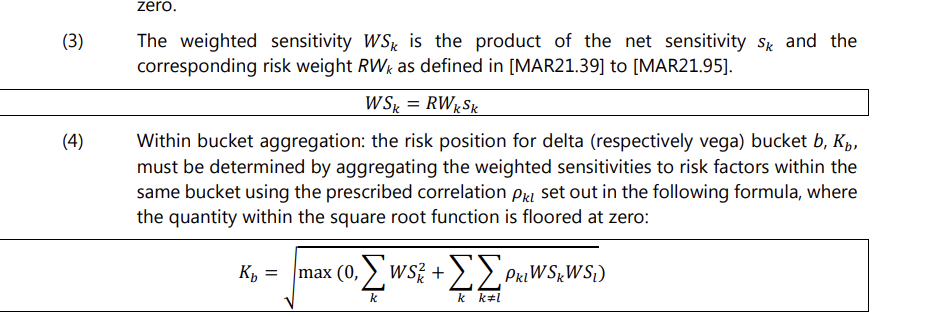



1. **Aggregation of Sensitivities and Vegas**:
   - **`net_weighted_sensitivity_by_currency_and_tenor`**: Aggregates the weighted sensitivities for each currency and tenor. This dictionary represents the net delta positions within each currency bucket and tenor.
   - **`net_weighted_vega_by_currency_and_tenor`**: Similarly, aggregates the weighted vega exposures for each currency and tenor, representing net vega positions.

2. **Within-Bucket Risk Calculation**:
   - **Function `calculate_within_bucket_risk`**: This function calculates the risk capital requirement within a single bucket, considering correlations between different tenors. It uses the formula:
     \[
     K_b = \sqrt{\max(0, \sum_{k,l} \rho_{kl} \cdot WS_k \cdot WS_l)}
     \]
     where \(\rho_{kl}\) is the correlation between tenors \(k\) and \(l\), and \(WS_k\) and \(WS_l\) are the weighted sensitivities or vegas for those tenors.

3. **Currency-Specific Risk Calculations**:
   - Calculates the within-bucket risk positions for each currency (`USD`, `SGD`, `EUR`) for both delta and vega. This involves calling `calculate_within_bucket_risk` for each currency and risk type.

4. **Conversion to EUR**:
   - **Function `convert_to_eur`**: Converts the calculated risk measures from the local currency to EUR using predefined exchange rates. This is necessary to aggregate risk across different currencies in a consistent manner.

5. **Conversion of Within-Bucket and Total Sensitivities**:
   - Converts both the within-bucket risk positions (`Kb`) and total sensitivities (`Sb`) for delta and vega from their respective currencies to EUR. This allows for consolidated reporting and aggregation across all positions.



In [ ]:

net_weighted_sensitivity_by_currency_and_tenor = flattened_trading_book_df.groupby(['Currency', 'Tenor'])['Weighted Sensitivity'].sum().to_dict()
net_weighted_vega_by_currency_and_tenor = flattened_trading_book_df.groupby(['Currency', 'Tenor'])['Weighted Vega'].sum().to_dict()

# Function to calculate within-bucket aggregated risk position
def calculate_within_bucket_risk(currency, net_weighted_measure_by_currency_and_tenor):
    sensitivities = {tenor: net_weighted_measure_by_currency_and_tenor.get((currency, tenor), 0) for tenor in tenors}
    Kb_squared = 0

    for tenor_k in tenors:
        for tenor_l in tenors:
            ρkl = correlation_matrix.get((tenor_k, tenor_l), 0)
            WSk = sensitivities[tenor_k]
            WSl = sensitivities[tenor_l]
            Kb_squared += ρkl * WSk * WSl

    Kb = np.sqrt(max(0, Kb_squared))
    return Kb

# Calculate within-bucket risk positions for each currency for delta and vega
Kb_USD_delta = calculate_within_bucket_risk('USD', net_weighted_sensitivity_by_currency_and_tenor)
Kb_SGD_delta = calculate_within_bucket_risk('SGD', net_weighted_sensitivity_by_currency_and_tenor)
Kb_EUR_delta = calculate_within_bucket_risk('EUR', net_weighted_sensitivity_by_currency_and_tenor)

Kb_USD_vega = calculate_within_bucket_risk('USD', net_weighted_vega_by_currency_and_tenor)
Kb_SGD_vega = calculate_within_bucket_risk('SGD', net_weighted_vega_by_currency_and_tenor)
Kb_EUR_vega = calculate_within_bucket_risk('EUR', net_weighted_vega_by_currency_and_tenor)

# Function to convert risk measures to EUR
def convert_to_eur(risk, currency):
    return risk * exchange_rates_to_eur[currency]

# Convert within-bucket risk positions to EUR for delta
Kb_USD_delta_EUR = convert_to_eur(Kb_USD_delta, 'USD')
Kb_SGD_delta_EUR = convert_to_eur(Kb_SGD_delta, 'SGD')
Kb_EUR_delta_EUR = convert_to_eur(Kb_EUR_delta, 'EUR')

# Convert within-bucket risk positions to EUR for vega
Kb_USD_vega_EUR = convert_to_eur(Kb_USD_vega, 'USD')
Kb_SGD_vega_EUR = convert_to_eur(Kb_SGD_vega, 'SGD')
Kb_EUR_vega_EUR = convert_to_eur(Kb_EUR_vega, 'EUR')

# Convert Sb values to EUR for delta
Sb_USD_delta_EUR = convert_to_eur(sum(net_weighted_sensitivity_by_currency_and_tenor.get(('USD', tenor), 0) for tenor in tenors), 'USD')
Sb_SGD_delta_EUR = convert_to_eur(sum(net_weighted_sensitivity_by_currency_and_tenor.get(('SGD', tenor), 0) for tenor in tenors), 'SGD')
Sb_EUR_delta_EUR = convert_to_eur(sum(net_weighted_sensitivity_by_currency_and_tenor.get(('EUR', tenor), 0) for tenor in tenors), 'EUR')

# Convert Sb values to EUR for vega
Sb_USD_vega_EUR = convert_to_eur(sum(net_weighted_vega_by_currency_and_tenor.get(('USD', tenor), 0) for tenor in tenors), 'USD')
Sb_SGD_vega_EUR = convert_to_eur(sum(net_weighted_vega_by_currency_and_tenor.get(('SGD', tenor), 0) for tenor in tenors), 'SGD')
Sb_EUR_vega_EUR = convert_to_eur(sum(net_weighted_vega_by_currency_and_tenor.get(('EUR', tenor), 0) for tenor in tenors), 'EUR')



#### some plots for sinsights fo Kb , Sb

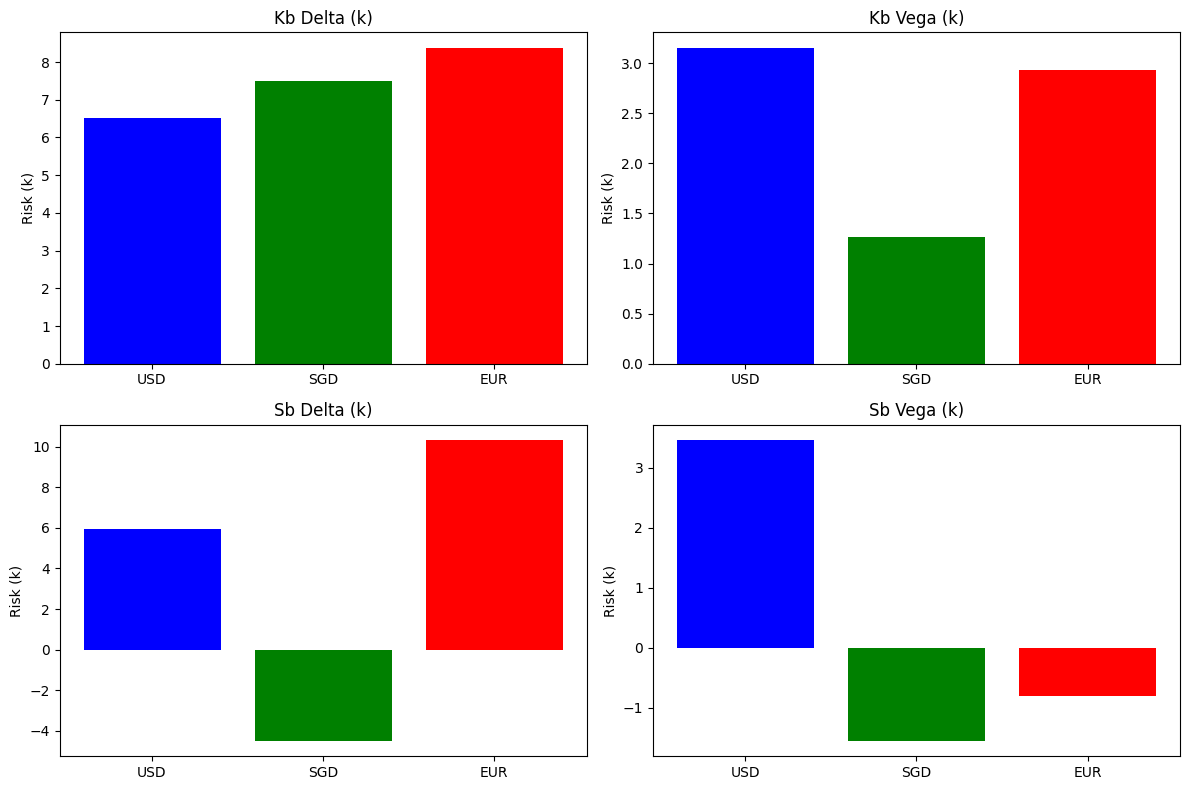

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the following data from your previous code:
# Kb_USD_delta_EUR, Kb_SGD_delta_EUR, Kb_EUR_delta_EUR
# Kb_USD_vega_EUR, Kb_SGD_vega_EUR, Kb_EUR_vega_EUR
# Sb_USD_delta_EUR, Sb_SGD_delta_EUR, Sb_EUR_delta_EUR
# Sb_USD_vega_EUR, Sb_SGD_vega_EUR, Sb_EUR_vega_EUR

# Sample data (replace with your actual data)
data = {
    'Currency': ['USD', 'SGD', 'EUR'],
    'Kb_Delta': [Kb_USD_delta_EUR, Kb_SGD_delta_EUR, Kb_EUR_delta_EUR],
    'Kb_Vega': [Kb_USD_vega_EUR, Kb_SGD_vega_EUR, Kb_EUR_vega_EUR],
    'Sb_Delta': [Sb_USD_delta_EUR, Sb_SGD_delta_EUR, Sb_EUR_delta_EUR],
    'Sb_Vega': [Sb_USD_vega_EUR, Sb_SGD_vega_EUR, Sb_EUR_vega_EUR]
}
df = pd.DataFrame(data)

# Round values to thousands (k)
for col in ['Kb_Delta', 'Kb_Vega', 'Sb_Delta', 'Sb_Vega']:
    df[col] = (df[col] / 1000).round(2)


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Kb Delta
axes[0, 0].bar(df['Currency'], df['Kb_Delta'], color=['blue', 'green', 'red'])
axes[0, 0].set_title('Kb Delta (k)')
axes[0, 0].set_ylabel('Risk (k)')

# Plot Kb Vega
axes[0, 1].bar(df['Currency'], df['Kb_Vega'], color=['blue', 'green', 'red'])
axes[0, 1].set_title('Kb Vega (k)')
axes[0, 1].set_ylabel('Risk (k)')


# Plot Sb Delta
axes[1, 0].bar(df['Currency'], df['Sb_Delta'], color=['blue', 'green', 'red'])
axes[1, 0].set_title('Sb Delta (k)')
axes[1, 0].set_ylabel('Risk (k)')

# Plot Sb Vega
axes[1, 1].bar(df['Currency'], df['Sb_Vega'], color=['blue', 'green', 'red'])
axes[1, 1].set_title('Sb Vega (k)')
axes[1, 1].set_ylabel('Risk (k)')

# Adjust layout
plt.tight_layout()
plt.show()


#### Stress Scenario- what will happen if pkl is mulatipleid by 1.5 for each tenor , how kb , sb will look like





Scenario: normal
Delta Risk in EUR: (np.float64(6521.930730818408), np.float64(7513.470189742044), np.float64(8372.021691585524))
Vega Risk in EUR: (np.float64(3146.8606245264996), np.float64(1274.7000466204947), np.float64(2934.4111185841534))
Scenario: stress
Delta Risk in EUR: (np.float64(7987.701214141042), np.float64(9202.084081240155), np.float64(10253.590629948507))
Vega Risk in EUR: (np.float64(3854.101410872963), np.float64(1561.1823446610701), np.float64(3593.904968040397))
Scenario: extreme_stress
Delta Risk in EUR: (np.float64(9223.402892381264), np.float64(10625.65144281915), np.float64(11839.826620721988))
Vega Risk in EUR: (np.float64(4450.332974103244), np.float64(1802.6980938883203), np.float64(4149.884001480114))


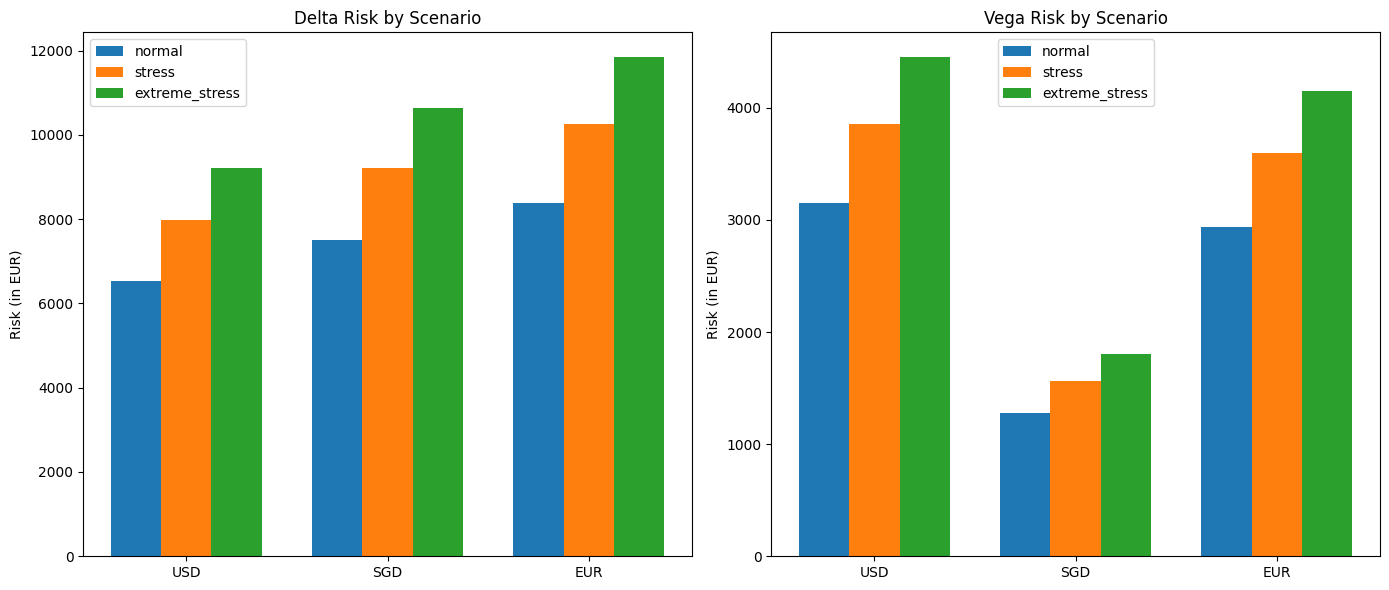

In [ ]:
# Define the scenarios
scenarios = {
    'normal': 1.0,
    'stress': 1.5,
    'extreme_stress': 2.0
}

# Function to calculate within-bucket aggregated risk position with scenario adjustment
def calculate_within_bucket_risk(currency, net_weighted_measure_by_currency_and_tenor, scenario='normal'):
    sensitivities = {tenor: net_weighted_measure_by_currency_and_tenor.get((currency, tenor), 0) for tenor in tenors}
    Kb_squared = 0
    scenario_multiplier = scenarios.get(scenario, 1.0)

    for tenor_k in tenors:
        for tenor_l in tenors:
            ρkl = correlation_matrix.get((tenor_k, tenor_l), 0) * scenario_multiplier
            WSk = sensitivities[tenor_k]
            WSl = sensitivities[tenor_l]
            Kb_squared += ρkl * WSk * WSl

    Kb = np.sqrt(max(0, Kb_squared))
    return Kb

# Calculate within-bucket risk positions for each currency for delta and vega under different scenarios
def calculate_risks_for_scenario(scenario):
    Kb_USD_delta = calculate_within_bucket_risk('USD', net_weighted_sensitivity_by_currency_and_tenor, scenario)
    Kb_SGD_delta = calculate_within_bucket_risk('SGD', net_weighted_sensitivity_by_currency_and_tenor, scenario)
    Kb_EUR_delta = calculate_within_bucket_risk('EUR', net_weighted_sensitivity_by_currency_and_tenor, scenario)

    Kb_USD_vega = calculate_within_bucket_risk('USD', net_weighted_vega_by_currency_and_tenor, scenario)
    Kb_SGD_vega = calculate_within_bucket_risk('SGD', net_weighted_vega_by_currency_and_tenor, scenario)
    Kb_EUR_vega = calculate_within_bucket_risk('EUR', net_weighted_vega_by_currency_and_tenor, scenario)

    # Convert within-bucket risk positions to EUR for delta
    Kb_USD_delta_EUR = convert_to_eur(Kb_USD_delta, 'USD')
    Kb_SGD_delta_EUR = convert_to_eur(Kb_SGD_delta, 'SGD')
    Kb_EUR_delta_EUR = convert_to_eur(Kb_EUR_delta, 'EUR')

    # Convert within-bucket risk positions to EUR for vega
    Kb_USD_vega_EUR = convert_to_eur(Kb_USD_vega, 'USD')
    Kb_SGD_vega_EUR = convert_to_eur(Kb_SGD_vega, 'SGD')
    Kb_EUR_vega_EUR = convert_to_eur(Kb_EUR_vega, 'EUR')

    return {
        'Kb_delta_EUR': (Kb_USD_delta_EUR, Kb_SGD_delta_EUR, Kb_EUR_delta_EUR),
        'Kb_vega_EUR': (Kb_USD_vega_EUR, Kb_SGD_vega_EUR, Kb_EUR_vega_EUR)
    }
scenario_results = {}

# Calculate and print results for each scenario
for scenario_name in scenarios.keys():
    risks = calculate_risks_for_scenario(scenario_name)
    scenario_results[scenario_name] = risks
    print(f"Scenario: {scenario_name}")
    print("Delta Risk in EUR:", risks['Kb_delta_EUR'])
    print("Vega Risk in EUR:", risks['Kb_vega_EUR'])


import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
width = 0.25
x = np.arange(len(currencies))

# Plot Delta Risk
for idx, scenario_name in enumerate(scenario_results.keys()):
    delta_values = scenario_results[scenario_name]['Kb_delta_EUR']
    ax[0].bar(x + width*idx, delta_values, width=width, label=scenario_name)

ax[0].set_title('Delta Risk by Scenario')
ax[0].set_xticks(x + width)
ax[0].set_xticklabels(currencies)
ax[0].set_ylabel('Risk (in EUR)')
ax[0].legend()

# Plot Vega Risk
for idx, scenario_name in enumerate(scenario_results.keys()):
    vega_values = scenario_results[scenario_name]['Kb_vega_EUR']
    ax[1].bar(x + width*idx, vega_values, width=width, label=scenario_name)

ax[1].set_title('Vega Risk by Scenario')
ax[1].set_xticks(x + width)
ax[1].set_xticklabels(currencies)
ax[1].set_ylabel('Risk (in EUR)')
ax[1].legend()

plt.tight_layout()
plt.show()


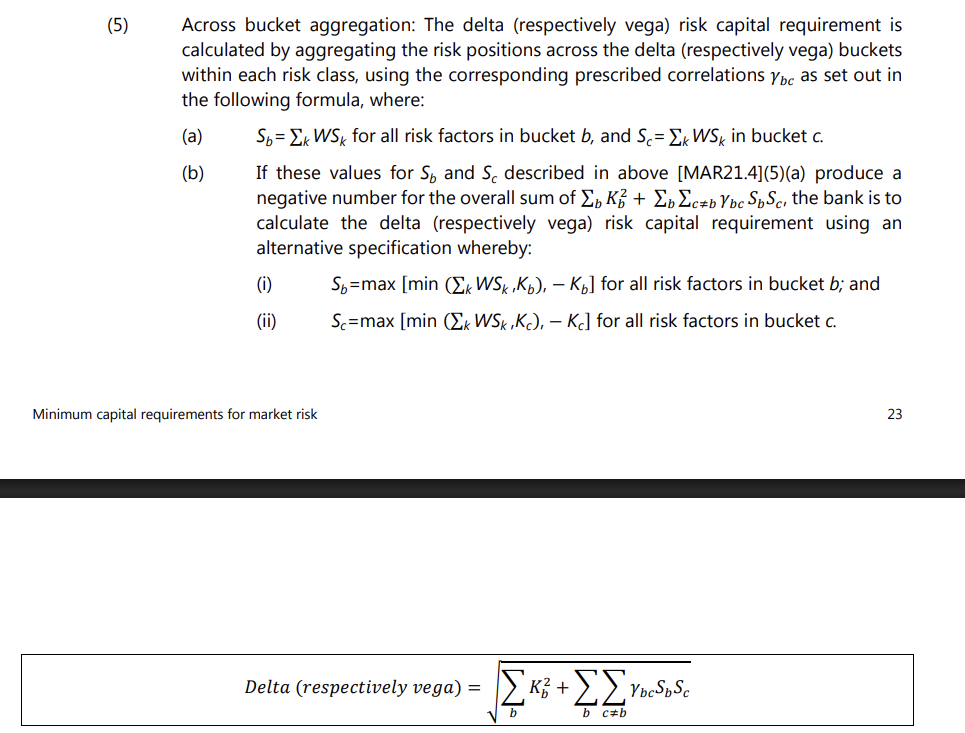

1. **Function `calculate_across_bucket_risk_in_eur`**:
   - **Purpose**: Computes the overall risk capital requirement in EUR across different currency buckets for either delta or vega risks.
   - **Parameters**:
     - `Kb_USD_EUR`, `Kb_SGD_EUR`, `Kb_EUR_EUR`: These represent the within-bucket capital requirements for the USD, SGD, and EUR currency buckets, respectively, converted to EUR.
     - `Sb_USD_EUR`, `Sb_SGD_EUR`, `Sb_EUR_EUR`: These are the net sensitivities (or "bucket sums") for the USD, SGD, and EUR currency buckets, respectively, converted to EUR.
   - **Formula**:
     \[
     \text{overall\_risk\_eur} = \sqrt{ Kb_{\text{USD}}^2 + Kb_{\text{SGD}}^2 + Kb_{\text{EUR}}^2 + 2 \cdot \gamma_{bc} \cdot (Sb_{\text{USD}} \cdot Sb_{\text{SGD}} + Sb_{\text{USD}} \cdot Sb_{\text{EUR}} + Sb_{\text{SGD}} \cdot Sb_{\text{EUR}}) }
     \]
     - The terms \(Kb_{\text{USD}}^2\), \(Kb_{\text{SGD}}^2\), and \(Kb_{\text{EUR}}^2\) represent the squared within-bucket risks, capturing the contributions from each currency bucket.
     - The term \(2 \cdot \gamma_{bc} \cdot (Sb_{\text{USD}} \cdot Sb_{\text{SGD}} + Sb_{\text{USD}} \cdot Sb_{\text{EUR}} + Sb_{\text{SGD}} \cdot Sb_{\text{EUR}})\) accounts for the cross-bucket correlations, where \(\gamma_{bc}\) is the correlation parameter between different buckets.

2. **Overall Risk Capital Calculation**:
   - **Delta Risk**:
     - Calls `calculate_across_bucket_risk_in_eur` with the delta-specific within-bucket and net sensitivity values.
   - **Vega Risk**:
     - Similarly, calls the same function with the vega-specific values.


### Importance in FRTB SA

- **Cross-Bucket Correlation**: By incorporating cross-bucket correlations through the \(\gamma_{bc}\) parameter, the code captures the potential diversification benefits or concentration risks that arise when considering multiple currency buckets together.
- **Consistency in Reporting**: Converting all risks to EUR ensures that the capital requirements are reported consistently, facilitating comparison and aggregation across different risk types.
- **Comprehensive Risk Measure**: This approach provides a holistic view of the risk capital requirements, combining both within-bucket and cross-bucket effects for a more complete assessment of market risk under the FRTB framework.



In [ ]:
# Function to calculate delta (or vega) risk capital requirement across buckets in EUR
def calculate_across_bucket_risk_in_eur(Kb_USD_EUR, Kb_SGD_EUR, Kb_EUR_EUR, Sb_USD_EUR, Sb_SGD_EUR, Sb_EUR_EUR):
    overall_risk_eur = np.sqrt(
        Kb_USD_EUR**2 + Kb_SGD_EUR**2 + Kb_EUR_EUR**2 +
        2 * gamma_bc * (Sb_USD_EUR * Sb_SGD_EUR + Sb_USD_EUR * Sb_EUR_EUR + Sb_SGD_EUR * Sb_EUR_EUR)
    )

    return overall_risk_eur

# Calculate the overall risk capital requirement in EUR for delta and vega
overall_risk_capital_delta_eur = calculate_across_bucket_risk_in_eur(
    Kb_USD_delta_EUR, Kb_SGD_delta_EUR, Kb_EUR_delta_EUR,
    Sb_USD_delta_EUR, Sb_SGD_delta_EUR, Sb_EUR_delta_EUR
)

overall_risk_capital_vega_eur = calculate_across_bucket_risk_in_eur(
    Kb_USD_vega_EUR, Kb_SGD_vega_EUR, Kb_EUR_vega_EUR,
    Sb_USD_vega_EUR, Sb_SGD_vega_EUR, Sb_EUR_vega_EUR
)

# Display the overall risk capital requirements in EUR
print("Overall Risk Capital Requirement (Delta) in EUR:", overall_risk_capital_delta_eur)
print("Overall Risk Capital Requirement (Vega) in EUR:", overall_risk_capital_vega_eur)

Overall Risk Capital Requirement (Delta) in EUR: 12535.023781221242
Overall Risk Capital Requirement (Vega) in EUR: 3638.416644625142


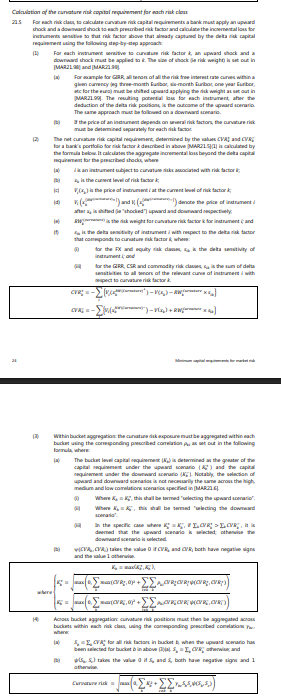



1. **Curvature Risk Weights**:
   - The `curvature_risk_weights` dictionary defines the risk weights for different tenors, reflecting the potential impact of interest rate changes on market values. These weights are used to simulate upward and downward shocks.

2. **Function `calculate_curvature_risk`**:
   - **Purpose**: Calculates the curvature risk for each trade.
   - **Process**:
     - For each tenor, apply an upward and downward shock to the market value using the corresponding risk weight.
     - The shocks are used to calculate the potential loss beyond what is captured by delta, using the formula:
       \[
       \text{Curvature Risk Increment} = -(\text{Shocked Price} - \text{Current Price} - \text{Delta Contribution})
       \]
     - Returns curvature risks for both upward and downward scenarios.

3. **Aggregation of Curvature Risk**:
   - Curvature risks are aggregated by currency and tenor, resulting in a structure that stores the total curvature risk for each currency and tenor combination.

4. **Function `calculate_bucket_level_capital_requirement`**:
   - **Purpose**: Calculates the bucket-level capital requirement for curvature risk.
   - **Process**:
     - For each tenor, calculate \(K_b^+\) and \(K_b^-\) using the correlations between tenors.
     - The calculation involves squaring the curvature risks and adding cross-tenor correlations:
       \[
       K_b^+ = \sqrt{\max(0, \sum \rho_{kl} \cdot CR^+_k \cdot CR^+_l)}
       \]
       \[
       K_b^- = \sqrt{\max(0, \sum \rho_{kl} \cdot CR^-_k \cdot CR^-_l)}
       \]
     - The correlation matrix is used to account for the linear relationships between different tenors.

5. **Calculation and Conversion**:
   - Calculate the curvature risk capital requirement for each currency by determining the maximum of \(K_b^+\) and \(K_b^-\) for each tenor.
   - Convert the total curvature risk capital from each currency to EUR using exchange rates, ensuring consistency in reporting.

6. **Output**:
   - The total curvature risk capital requirement is printed in EUR, providing a consolidated view of the potential capital needed to cover non-linear risks.

### Importance in FRTB SA

- **Non-linear Risk Capture**: This code captures the curvature risk, which is essential for understanding how non-linear price changes can affect the capital requirement.
- **Comprehensive Risk Aggregation**: By aggregating risks by currency and tenor and considering correlations, the code ensures a thorough assessment of market risk.
- **Regulatory Compliance**: The calculated risk capital requirements help banks comply with FRTB regulations, ensuring they maintain sufficient capital to cover potential market losses.

Overall, this code is crucial for determining the curvature risk capital requirements under FRTB SA, helping banks manage and report their market risk exposures effectively.

In [ ]:
curvature_risk_weights = {
    '0.25Y': 0.02,
    '0.5Y': 0.02,
    '1Y': 0.018,
    '2Y': 0.015,
    '3Y': 0.014,
    '5Y': 0.013,
    '10Y': 0.013,
    '15Y': 0.013,
    '20Y': 0.013,
    '30Y': 0.013
}

def calculate_curvature_risk(trade):
    curvature_risk_plus = {}
    curvature_risk_minus = {}

    for tenor, sensitivity in trade['Sensitivities'].items():
        current_price = trade['Market Value']
        risk_weight = curvature_risk_weights[tenor]

        # Simulate price changes with upward and downward shocks
        shocked_price_up = current_price * (1 + risk_weight)
        shocked_price_down = current_price * (1 - risk_weight)

        # Calculate curvature risk increment
        delta_contribution = sensitivity * risk_weight
        curvature_risk_plus[tenor] = -(shocked_price_up - current_price - delta_contribution)
        curvature_risk_minus[tenor] = -(shocked_price_down - current_price + delta_contribution)

    return curvature_risk_plus, curvature_risk_minus

# Aggregate curvature risk by currency and tenor
curvature_risk_by_currency_and_tenor = {'USD': {}, 'SGD': {}, 'EUR': {}}

for trade in interest_rate_trading_book:
    currency = trade['Currency']
    curvature_plus, curvature_minus = calculate_curvature_risk(trade)
    for tenor in tenors:
        if tenor not in curvature_risk_by_currency_and_tenor[currency]:
            curvature_risk_by_currency_and_tenor[currency][tenor] = [0, 0]

        curvature_risk_by_currency_and_tenor[currency][tenor][0] += curvature_plus[tenor]
        curvature_risk_by_currency_and_tenor[currency][tenor][1] += curvature_minus[tenor]

# Function to calculate the bucket-level capital requirement
def calculate_bucket_level_capital_requirement(currency):
    Kb_plus = {}
    Kb_minus = {}

    for tenor in tenors:
        CR_plus = curvature_risk_by_currency_and_tenor[currency][tenor][0]
        CR_minus = curvature_risk_by_currency_and_tenor[currency][tenor][1]

        # Calculate Kb_plus and Kb_minus using the correlation matrix
        Kb_plus_sum = max(0, CR_plus) ** 2
        Kb_minus_sum = max(0, CR_minus) ** 2

        for other_tenor in tenors:
            if other_tenor != tenor:
                correlation = correlation_matrix.get((tenor, other_tenor), 0)
                CR_other_plus = curvature_risk_by_currency_and_tenor[currency][other_tenor][0]
                CR_other_minus = curvature_risk_by_currency_and_tenor[currency][other_tenor][1]

                Kb_plus_sum += correlation * CR_plus * CR_other_plus
                Kb_minus_sum += correlation * CR_minus * CR_other_minus

        Kb_plus[tenor] = np.sqrt(max(0, Kb_plus_sum))
        Kb_minus[tenor] = np.sqrt(max(0, Kb_minus_sum))

    return Kb_plus, Kb_minus

# Calculate curvature risk capital requirement for each currency
curvature_risk_capital_by_currency = {}

for currency in currencies:
    Kb_plus, Kb_minus = calculate_bucket_level_capital_requirement(currency)
    Kb = {tenor: max(Kb_plus[tenor], Kb_minus[tenor]) for tenor in tenors}
    curvature_risk_capital_by_currency[currency] = Kb

# Convert curvature risk capital to EUR
total_curvature_risk_capital_eur = sum(
    curvature_risk_capital_by_currency[currency][tenor] * exchange_rates_to_eur[currency]
    for currency in currencies for tenor in tenors
)

# Display the total curvature risk capital requirement in EUR


Total Curvature Risk Capital Requirement in EUR: 93385177.95249166


In [ ]:
print("Total Market Risk Capital Requirement in Normal Scenario :", total_curvature_risk_capital_eur+overall_risk_capital_vega_eur+overall_risk_capital_delta_eur)

Total Market Risk Capital Requirement in Normal Scenario : 93401351.3929175


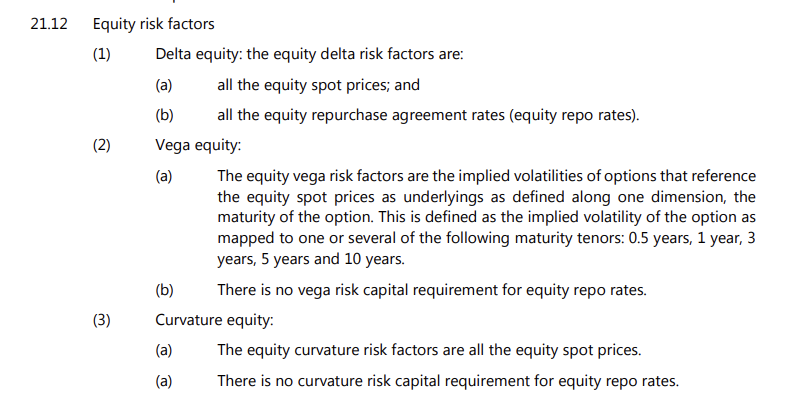

1. **Setup and Trade Generation**:
   - **Equities and Counterparties**: Lists of equity names and counterparties are defined for trade generation.
   - **Option Tenors**: Specifies the tenors for which vega risk is calculated.
   - **Risk Weights**: Defines example risk weights for delta, vega, and curvature for each equity. These weights are used to calculate the risk capital requirements.

2. **Function `generate_equity_trade`**:
   - **Purpose**: Simulates an equity trade with random attributes.
   - **Process**:
     - Selects a random equity, quantity, and spot price to determine the market value.
     - Calculates delta sensitivity based on a random factor and market value.
     - Calculates vega sensitivities for each tenor, representing the sensitivity of the trade's value to changes in implied volatility.

3. **Function `calculate_equity_curvature_risk`**:
   - **Purpose**: Calculates the curvature risk for a given trade.
   - **Process**:
     - Applies upward and downward shocks to the equity's spot price based on the curvature risk weight.
     - Calculates the curvature risk increment as the difference between the shocked and current prices, adjusted for delta contribution.
     - Returns curvature risk values for both upward and downward scenarios.

4. **Function `calculate_equity_risks`**:
   - **Purpose**: Aggregates delta, vega, and curvature risks for the entire portfolio.
   - **Process**:
     - Iterates over all trades to calculate and accumulate the delta and vega risks using their respective weights.
     - Aggregates curvature risks across trades, considering both upward and downward scenarios.
     - The overall curvature risk for the portfolio is the maximum of the aggregated upward and downward risks.

5. **Risk Calculation and Output**:
   - **Risk Calculation**: Calls the `calculate_equity_risks` function to compute the total delta, vega, and curvature risks for the portfolio.
   - **Output**: Prints the calculated risks, providing a comprehensive view of the portfolio's risk profile.

### Importance in FRTB SA

- **Sensitivity-Based Approach**: The code follows the FRTB SA by calculating risk capital based on sensitivities to market factors, capturing potential losses due to changes in equity prices and volatilities.
- **Non-Linear Risk Capture**: Curvature risk calculations account for non-linear price changes, ensuring a more accurate representation of market risk.
- **Comprehensive Risk Assessment**: By calculating delta, vega, and curvature risks, the code provides a holistic view of market risk, which is crucial for determining capital requirements.

Overall, this code is a practical implementation of the FRTB SA framework, helping financial institutions assess and manage their market risk exposures effectively.

In [ ]:
# Function to calculate curvature risk for each trade
import random
import pandas as pd
import numpy as np

# Define equity names, counterparties, and option tenors
equities = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
counterparties = ['Goldman Sachs', 'JPMorgan', 'Morgan Stanley', 'Citibank']
option_tenors = ['0.5Y', '1Y', '3Y', '5Y', '10Y']

# Define risk weights for delta, vega, and curvature (example values)
equity_delta_risk_weights = {'AAPL': 0.15, 'GOOGL': 0.18, 'MSFT': 0.16, 'AMZN': 0.17, 'TSLA': 0.20}
equity_vega_risk_weights = {tenor: 0.25 for tenor in option_tenors}
equity_curvature_risk_weights = {'AAPL': 0.20, 'GOOGL': 0.22, 'MSFT': 0.21, 'AMZN': 0.23, 'TSLA': 0.25}

def generate_equity_trade(trade_id):
    equity = random.choice(equities)
    quantity = random.randint(10, 1000)
    spot_price = round(random.uniform(100, 1500), 2)
    market_value = round(quantity * spot_price, 2)
    counterparty = random.choice(counterparties)

    # Calculate delta sensitivities
    delta_sensitivity = round(random.uniform(-1, 1), 2) * market_value / 100

    # Calculate vega sensitivities for each tenor
    vega_sensitivities = {}
    for tenor in option_tenors:
        vega_sensitivity = round(random.uniform(-0.5, 0.5), 2) * market_value / 100
        vega_sensitivities[tenor] = vega_sensitivity

    trade_data = {
        'Trade ID': trade_id,
        'Equity': equity,
        'Quantity': quantity,
        'Spot Price': spot_price,
        'Market Value': market_value,
        'Counterparty': counterparty,
        'Delta Sensitivity': delta_sensitivity,
        'Vega Sensitivities': vega_sensitivities
    }
    return trade_data
equity_trading_book = [generate_equity_trade(trade_id) for trade_id in range(1, 501)]
def calculate_equity_curvature_risk(trade):
    equity = trade['Equity']
    delta_sensitivity = trade['Delta Sensitivity']
    current_price = trade['Spot Price']
    curvature_risk_weight = equity_curvature_risk_weights[equity]

    # Simulate shocks
    shocked_price_up = current_price * (1 + curvature_risk_weight)
    shocked_price_down = current_price * (1 - curvature_risk_weight)

    # Calculate curvature risk increment
    curvature_risk_plus = -(shocked_price_up - current_price - delta_sensitivity * curvature_risk_weight)
    curvature_risk_minus = -(shocked_price_down - current_price + delta_sensitivity * curvature_risk_weight)

    return curvature_risk_plus, curvature_risk_minus

# Calculate delta, vega, and curvature risk
def calculate_equity_risks(equity_trading_book):
    delta_risk = 0
    vega_risk = 0
    total_curvature_risk_plus = 0
    total_curvature_risk_minus = 0

    for trade in equity_trading_book:
        equity = trade['Equity']
        delta_sensitivity = trade['Delta Sensitivity']
        delta_risk_weight = equity_delta_risk_weights[equity]
        delta_risk += delta_sensitivity * delta_risk_weight

        for tenor, vega_sensitivity in trade['Vega Sensitivities'].items():
            vega_risk_weight = equity_vega_risk_weights[tenor]
            vega_risk += vega_sensitivity * vega_risk_weight

        # Calculate curvature risk using shocks
        curvature_plus, curvature_minus = calculate_equity_curvature_risk(trade)
        total_curvature_risk_plus += curvature_plus
        total_curvature_risk_minus += curvature_minus

    # Aggregate the curvature risk
    curvature_risk = max(total_curvature_risk_plus, total_curvature_risk_minus)
    return delta_risk, vega_risk, curvature_risk

# Calculate risks for the portfolio
delta_risk, vega_risk, curvature_risk = calculate_equity_risks(equity_trading_book)

# Display the calculated risks
print("Total Delta Risk:", delta_risk)
print("Total Vega Risk:", vega_risk)
print("Total Curvature Risk:", curvature_risk)

Total Delta Risk: -8888.646444949994
Total Vega Risk: -14717.127015249976
Total Curvature Risk: 97995.96103914008


In [ ]:
print("Total Market Risk Capital Requirement in Normal Scenario for Equity Portfolio :", curvature_risk+vega_risk+delta_risk)

Total Market Risk Capital Requirement in Normal Scenario for Equity Portfolio : -8714.116931039389


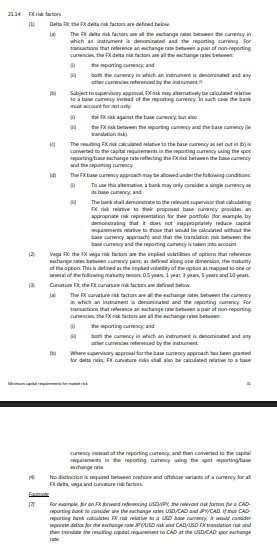


1. **Setup**:
   - **Currency Pairs and Counterparties**: Lists of currency pairs and counterparties are defined for trade generation.
   - **Option Tenors**: Specifies the tenors for which vega risk is calculated.
   - **Risk Weights**: Defines example risk weights for delta, vega, and curvature for each currency pair. These weights are used to calculate the risk capital requirements.

2. **Function `generate_fx_trade`**:
   - **Purpose**: Simulates an FX trade with random attributes.
   - **Process**:
     - Selects a random currency pair, notional amount, and spot rate to determine the market value.
     - Calculates delta sensitivity based on a random factor and market value, representing the trade's sensitivity to changes in exchange rates.
     - Calculates vega sensitivities for each tenor, representing the sensitivity of the trade's value to changes in implied volatility.

3. **Function `calculate_fx_risks`**:
   - **Purpose**: Aggregates delta, vega, and curvature risks for the entire portfolio.
   - **Process**:
     - Iterates over all trades to calculate and accumulate the delta and vega risks using their respective weights.
     - **Curvature Risk Calculation**:
       - For each trade, applies upward and downward shocks to the spot rate using the curvature risk weight.
       - Calculates the curvature risk increment as the difference between the shocked and current prices, adjusted for delta contribution.
       - Aggregates curvature risks across currency pairs, considering both upward and downward scenarios.
     - **Aggregation**:
       - Aggregates the curvature risk using the squared values and cross-pair correlations, using a correlation parameter (\( \gamma_{bc} = 0.60 \)).

4. **Risk Calculation and Output**:
   - **Risk Calculation**: Calls the `calculate_fx_risks` function to compute the total delta, vega, and curvature risks for the portfolio.
   - **Output**: Prints the calculated risks, providing a comprehensive view of the portfolio's risk profile.

### Importance in FRTB SA

- **Sensitivity-Based Approach**: The code follows the FRTB SA by calculating risk capital based on sensitivities to market factors, capturing potential losses due to changes in FX rates and volatilities.
- **Non-Linear Risk Capture**: Curvature risk calculations account for non-linear price changes, ensuring a more accurate representation of market risk.
- **Comprehensive Risk Assessment**: By calculating delta, vega, and curvature risks, the code provides a holistic view of market risk, which is crucial for determining capital requirements.


In [ ]:
import random
import pandas as pd
import numpy as np

# Define currency pairs, counterparties, and option tenors
currency_pairs = [('EUR', 'USD'), ('USD', 'JPY'), ('GBP', 'USD'), ('AUD', 'USD'), ('USD', 'CAD')]
counterparties = ['Goldman Sachs', 'JPMorgan', 'Morgan Stanley', 'Citibank']
option_tenors = ['0.5Y', '1Y', '3Y', '5Y', '10Y']

# Define risk weights for delta, vega, and curvature (example values)
fx_delta_risk_weights = {pair: 0.15 for pair in currency_pairs}  # Unique relative risk weight of 15%
fx_vega_risk_weights = {tenor: 0.20 for tenor in option_tenors}
fx_curvature_risk_weights = {pair: 0.15 for pair in currency_pairs}  # Same 15% risk weight for curvature
correlation_fx = 0.60  # Uniform correlation parameter for delta FX

# Function to generate an FX trade
def generate_fx_trade(trade_id):
    currency_pair = random.choice(currency_pairs)
    notional = random.randint(100000, 1000000)
    spot_rate = round(random.uniform(0.5, 1.5), 4)
    market_value = round(notional * spot_rate, 2)
    counterparty = random.choice(counterparties)

    # Calculate delta sensitivities
    delta_sensitivity = round(random.uniform(-0.5, 0.5), 2) * market_value / 100

    # Calculate vega sensitivities for each tenor
    vega_sensitivities = {}
    for tenor in option_tenors:
        vega_sensitivity = round(random.uniform(-0.2, 0.2), 2) * market_value / 100
        vega_sensitivities[tenor] = vega_sensitivity

    trade_data = {
        'Trade ID': trade_id,
        'Currency Pair': currency_pair,
        'Notional': notional,
        'Spot Rate': spot_rate,
        'Market Value': market_value,
        'Counterparty': counterparty,
        'Delta Sensitivity': delta_sensitivity,
        'Vega Sensitivities': vega_sensitivities
    }
    return trade_data

# Create an FX trading book
fx_trading_book = [generate_fx_trade(trade_id) for trade_id in range(1, 501)]

# Function to calculate FX risks
def calculate_fx_risks(fx_trading_book):
    delta_risk = 0
    vega_risk = 0
    total_curvature_risk_plus = {}
    total_curvature_risk_minus = {}

    # Initialize curvature risk dictionaries
    for pair in currency_pairs:
        total_curvature_risk_plus[pair] = 0
        total_curvature_risk_minus[pair] = 0

    for trade in fx_trading_book:
        currency_pair = trade['Currency Pair']
        delta_sensitivity = trade['Delta Sensitivity']
        delta_risk_weight = fx_delta_risk_weights[currency_pair]
        delta_risk += delta_sensitivity * delta_risk_weight

        for tenor, vega_sensitivity in trade['Vega Sensitivities'].items():
            vega_risk_weight = fx_vega_risk_weights[tenor]
            vega_risk += vega_sensitivity * vega_risk_weight

        # Calculate curvature risk using shocks
        curvature_risk_weight = fx_curvature_risk_weights[currency_pair]
        shocked_rate_up = trade['Spot Rate'] * (1 + curvature_risk_weight)
        shocked_rate_down = trade['Spot Rate'] * (1 - curvature_risk_weight)

        curvature_risk_plus = -(shocked_rate_up - trade['Spot Rate'] - delta_sensitivity * curvature_risk_weight)
        curvature_risk_minus = -(shocked_rate_down - trade['Spot Rate'] + delta_sensitivity * curvature_risk_weight)

        total_curvature_risk_plus[currency_pair] += curvature_risk_plus
        total_curvature_risk_minus[currency_pair] += curvature_risk_minus

    # Aggregate the curvature risk across currency pairs
    Kb_plus = sum(max(0, total_curvature_risk_plus[pair])**2 for pair in currency_pairs)
    Kb_minus = sum(max(0, total_curvature_risk_minus[pair])**2 for pair in currency_pairs)

    # Add cross pair correlations
    for pair_i in currency_pairs:
        for pair_j in currency_pairs:
            if pair_i != pair_j:
                Kb_plus += correlation_fx * total_curvature_risk_plus[pair_i] * total_curvature_risk_plus[pair_j]
                Kb_minus += correlation_fx * total_curvature_risk_minus[pair_i] * total_curvature_risk_minus[pair_j]

    curvature_risk = np.sqrt(max(Kb_plus, Kb_minus))
    return delta_risk, vega_risk, curvature_risk

# Calculate risks for the portfolio
delta_risk, vega_risk, curvature_risk = calculate_fx_risks(fx_trading_book)

# Display the calculated risks
print("Total Delta Risk:", delta_risk)
print("Total Vega Risk:", vega_risk)
print("Total Curvature Risk:", curvature_risk)

Total Delta Risk: -4725.0674813999985
Total Vega Risk: -9185.472365000045
Total Curvature Risk: 5196.422915360655


In [ ]:
print("Total Market Risk Capital Requirement in Normal Scenario for FX Portfolio :", curvature_risk+vega_risk+delta_risk)

Total Market Risk Capital Requirement in Normal Scenario for FX Portfolio : -8714.116931039389


## WHY FRTB SA

The Fundamental Review of the Trading Book (FRTB) standardized approach (SA) is designed to provide a consistent framework for calculating the capital requirements for market risk across various financial institutions. The FRTB SA uses a parametric approach to quantify risks, which involves defining risk measures in terms of parameters that describe market conditions, portfolio sensitivities, and risk weights. Here are some key aspects and how they relate to a parametric form:

### 1. Sensitivity-Based Measure
- **Delta, Vega, and Curvature Sensitivities**:
  - The approach calculates risk capital based on the sensitivities of a portfolio to changes in market risk factors, such as interest rates, equity prices, FX rates, etc.
  - Sensitivities are expressed as parameters that quantify how much a portfolio's value changes in response to a small change in a risk factor.

### 2. Risk Weights
- **Parametric Risk Weights**:
  - Risk weights are parameters that reflect the relative riskiness of different positions or assets.
  - For example, higher risk weights are assigned to more volatile assets or positions, influencing the overall capital requirement.

### 3. Correlation Matrices
- **Correlated Risks**:
  - The approach uses correlation matrices to account for the relationships between different risk factors or asset classes.
  - Correlation parameters define how sensitivities across different buckets or risk factors interact with one another.

### 4. Aggregation Formula
- **Parametric Aggregation**:
  - The FRTB SA uses a parametric formula to aggregate risk measures across different components, such as delta, vega, and curvature.
  - The aggregation formula typically involves summing the weighted and correlated sensitivities, represented as:
    from IPython.display import display, Math

# Define the equation as a LaTeX string
$$
\text{Capital Requirement} = \sqrt{\sum (\text{Risk Weight} \times \text{Sensitivity})^2 + 2 \times \sum (\text{Correlation} \times \text{Risk Weight} \times \text{Sensitivity})}
$$


### 5. Scenario Analysis
- **Stress Scenarios**:
  - FRTB requires the consideration of stress scenarios, where parameters such as correlations and risk weights are adjusted to reflect extreme market conditions.
  - Stress multipliers are applied to parameters to simulate scenarios like economic downturns or market shocks.

### 6. Capital Charge Calculation
- **Parametric Form**:
  - The final capital charge is calculated by summing the risk contributions from different risk factors, each parameterized by its sensitivity, risk weight, and correlation.

### Summary
The FRTB SA's parametric form allows it to systematically incorporate the effects of various market risk factors into a single, coherent framework for capital calculation. By using parameters such as sensitivities, risk weights, and correlations, the approach provides a quantitative basis for assessing the market risk of a portfolio and determining the required capital reserves. This parametric approach ensures consistency, transparency, and comparability across different financial institutions and market conditions.


In [ ]:
## is this the new one or just fixed corrletation scenario of rparametric var

## is this the new one or just fixed corrletation senario of parametric var

The parametric Value-at-Risk (VaR) method and the Fundamental Review of the Trading Book (FRTB) standardized approach (SA) share some fundamental similarities in their goals and methodologies, despite differences in complexity and implementation. Here’s how they are similar:

### 1. Quantification of Market Risk
- **Objective**: Both parametric VaR and FRTB aim to quantify market risk, providing a measure of potential losses due to adverse market movements. They are used to determine the capital reserves financial institutions need to hold.

### 2. Sensitivity to Risk Factors
- **Risk Factor Sensitivity**:
  - Both methods rely on sensitivities to market risk factors, such as changes in interest rates, equity prices, and exchange rates. Parametric VaR considers these factors through a covariance matrix, while FRTB uses delta, vega, and curvature sensitivities.

### 3. Use of Historical Data
- **Historical Volatility and Correlations**:
  - Both approaches use historical data to estimate volatility and correlations among risk factors. This data is crucial for calculating risk measures.

### 4. Statistical Assumptions
- **Normal Distribution**:
  - Both methods often assume that returns are normally distributed, allowing for the use of statistical measures like standard deviation and mean in the risk calculation.

### 5. Aggregation of Risks
- **Portfolio Aggregation**:
  - Both approaches aggregate risks across different risk factors to compute total portfolio risk. This involves summing up risk measures and accounting for diversification effects through correlations.

### 6. Correlation and Diversification
- **Correlation Matrices**:
  - Both methods use correlation matrices to understand how different risk factors interact, affecting the overall risk profile. This helps assess diversification benefits.

### 7. Capital Requirement Calculation
- **Risk-Based Capital**:
  - Both methods result in the calculation of a risk-based capital requirement that institutions must hold to cover potential losses. The capital charge reflects the level of market risk exposure.

### Summary
Parametric VaR and FRTB SA both aim to measure and manage market risk using statistical methods, sensitivities to risk factors, and historical data. While FRTB is more detailed and sophisticated, incorporating additional elements like curvature risk and stress scenarios, the fundamental principles of risk quantification and capital determination remain consistent across both approaches.

## How Regulator look at it ?

Regulators interpret the FRTB Standardized Approach (SA) as a significant advancement in the measurement and management of market risk. Here’s how they view and interpret the FRTB SA:

### 1. Enhanced Risk Sensitivity
- **Granular Risk Measurement**: Regulators appreciate the FRTB SA's granular approach, which captures delta, vega, and curvature risks. This detailed sensitivity analysis allows for a more accurate assessment of a bank's exposure to market risk factors.

### 2. Comprehensive Risk Coverage
- **Broad Risk Factor Inclusion**: The FRTB SA covers a wide range of risk factors, including interest rates, equities, foreign exchange, and commodities. This comprehensive coverage ensures that all significant sources of market risk are considered.

### 3. Improved Capital Adequacy Standards
- **Risk-Based Capital Requirements**: The approach provides a more robust framework for calculating capital requirements, reflecting the true risk exposure of a bank. Regulators see this as crucial for maintaining financial stability and ensuring that banks hold sufficient capital reserves.

### 4. Stress Testing and Scenario Analysis
- **Integration of Extreme Scenarios**: By incorporating stress testing and scenario analysis, the FRTB SA ensures that banks are prepared for extreme market conditions. Regulators value this as it tests the resilience of financial institutions under adverse scenarios.

### 5. Transparency and Consistency
- **Standardization Across Institutions**: The standardized approach promotes consistency in risk measurement and capital calculation across banks. This transparency helps regulators compare risk profiles and capital adequacy on a level playing field.

### 6. Incentive for Risk Management Improvements
- **Encouraging Robust Risk Practices**: By requiring detailed risk assessments and accurate data inputs, the FRTB SA encourages banks to improve their risk management practices. Regulators see this as a way to foster a more stable financial system.

### 7. Alignment with Global Standards
- **International Consistency**: The FRTB SA aligns with Basel Committee standards, ensuring that banks globally adhere to common risk management and capital adequacy principles. This alignment facilitates international regulatory cooperation and oversight.

### 8. Focus on Diversification and Correlation
- **Recognition of Diversification Benefits**: By considering diversification and correlation effects in risk aggregation, the FRTB SA provides a realistic view of risk exposure. Regulators value this as it reflects the true risk-reducing benefits of diversified portfolios.

### Summary
Regulators interpret the FRTB SA as a forward-looking, comprehensive framework that enhances the measurement and management of market risk. By providing more granular risk sensitivity, integrating stress scenarios, and promoting transparency and consistency, the FRTB SA helps ensure that banks maintain adequate capital reserves and are prepared for both normal and extreme market conditions. This contributes to the overall stability and resilience of the financial system.